Name: Sagar Narsingani.

Roll Number: 19BCP114.

Branch: Computer Engineering (G3 Batch).

Subject: Pattern Recognization.

In [ ]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
# generating data.
mean1 = [4, 7]
mean2 = [1, 8]
mean3 = [5, 9]
def generateData(cov):
  M = 3; N=150
  
  d1 = np.random.multivariate_normal(mean1, cov, N//M)
  plt.scatter(d1[:, 0], d1[:, 1], c='green')
  
  d2 = np.random.multivariate_normal(mean2, cov, N//M)
  plt.scatter(d2[:, 0], d2[:, 1], c='yellow')
  
  d3 = np.random.multivariate_normal(mean3, cov, N//M)
  plt.scatter(d3[:, 0], d3[:, 1], c='red')
  
  print("Initial Data: ")
  plt.show()
  
  return d1.tolist(), d2.tolist(), d3.tolist()

In [ ]:
def euclidianDist(x1, x2):
  dist = 0;
  for i in range(len(x1)):
    dist = dist + (x1[i]-x2[i])**2
  return sqrt(dist)

def getMean(x):
  i=0;j=0
  for d in x:
    i = i + d[0]
    j = j + d[1]
  i = i / len(x)
  j = j / len(x)
  return [i, j]

def isDone(c1, t1, c2, t2, c3, t3):
  for c in c1:
    if(c not in t1):
      return False
  
  for c in c2:
    if(c not in t2):
      return False

  for c in c3:
    if(c not in t3):
      return False
  
  return True

In [ ]:
def KMeans(data):
  s = [mean1, mean2, mean3]
  c1 = []; c2 = []; c3 = []
  t1 = []; t2 = []; t3 = []
  i=0
  while (i<100):
    for x in data:
      d = []
      for seed in s:
        d.append(euclidianDist(x, seed))
      c = d.index(min(d))
      if(c==0):
        c1.append(x)
      if(c==1):
        c2.append(x)
      if(c==2):
        c3.append(x)

    s[0] = getMean(c1)
    s[1] = getMean(c2)
    s[2] = getMean(c3)
    if(isDone(c1, t1, c2, t2, c3, t3)):
      return c1, c2, c3

    t1 = c1; t2 = c2; t3 = c3
    c1 = []; c2 = []; c3 = []
    i+=1
  return t1, t2, t3

In [ ]:
def getAccuracy(c1, c2, c3, d1, d2, d3):
  fault = 0
  for c in c1:
    if(c not in d1):
      fault = fault + 1

  for c in c2:
    if(c not in d2):
      fault = fault + 1

  for c in c3:
    if(c not in d3):
      fault = fault + 1

  n = len(d1) + len(d2) + len(d3)
  return ((n-fault)*100/n)

Initial Data: 


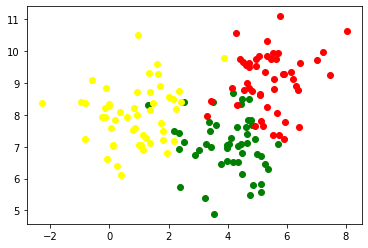

Clustered Data: 


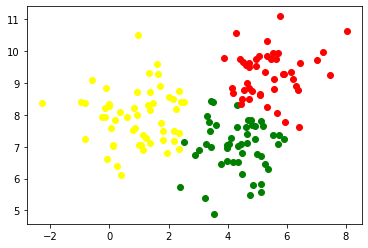

Accuracy: 87.33333333333333

Initial Data: 


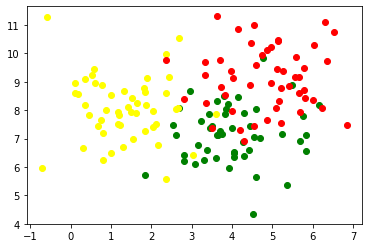

Clustered Data: 


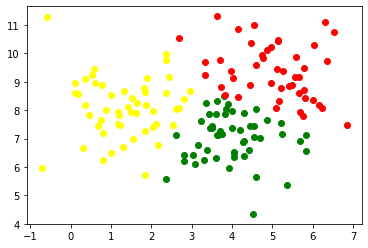

Accuracy: 84.66666666666667

Initial Data: 


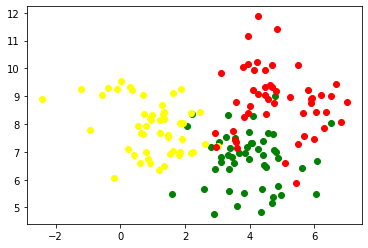

Clustered Data: 


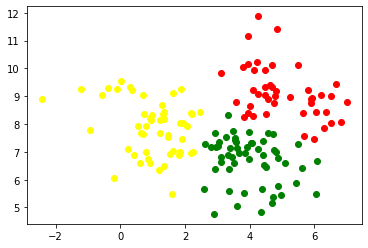

Accuracy: 88.66666666666667

Initial Data: 


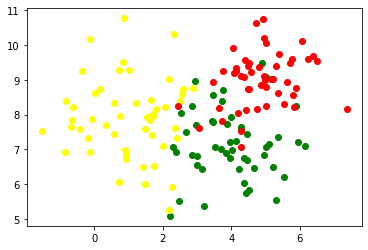

Clustered Data: 


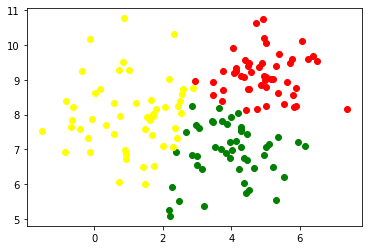

Accuracy: 88.0

Initial Data: 


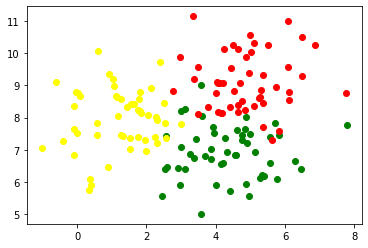

Clustered Data: 


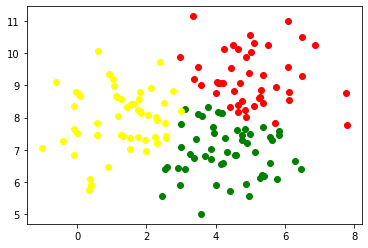

Accuracy: 89.33333333333333



In [ ]:
for i in range(5):
  d1, d2, d3 = generateData([[1, 0], [0, 1]])
  data = [*d1, *d2, *d3]
  c1, c2, c3 = KMeans(data)
  acc = getAccuracy(c1, c2, c3, d1, d2, d3)
  c1 = np.array(c1)
  c2 = np.array(c2)
  c3 = np.array(c3)
  plt.scatter(c1[:, 0], c1[:, 1], c='green')
  plt.scatter(c2[:, 0], c2[:, 1], c='yellow')
  plt.scatter(c3[:, 0], c3[:, 1], c='red')
  print("Clustered Data: ")
  plt.show()
  print("Accuracy:", acc)
  print()